<a href="https://colab.research.google.com/github/vlad-danaila/machine-learning-workout/blob/master/Pytorch_Workout_Convolutional_CIFAR10_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CIFAR10 Classification**

In [0]:
!pip3 install torch torchvision

In [0]:
import numpy as np
import torch as t
import torchvision as tv
import PIL as pil
import requests as req
import matplotlib.pyplot as plt

**Loading Data**

In [0]:
normalization_params = (.5, .5, .5)

transform_train = tv.transforms.Compose([
    tv.transforms.ColorJitter(brightness = .1, contrast = .1, saturation = .1, hue = .1),
    tv.transforms.RandomAffine(degrees = 0, scale = (.8, 1.2), shear = 10),
    tv.transforms.RandomHorizontalFlip(),
    tv.transforms.ToTensor(),
    tv.transforms.Normalize(mean = normalization_params, std = normalization_params),
])
transform_valid = tv.transforms.Compose([
    tv.transforms.ToTensor(),
    tv.transforms.Normalize(mean = normalization_params, std = normalization_params),
])

dataset_train = tv.datasets.CIFAR10('.', train = True, download = True, transform = transform_train)
dataset_valid = tv.datasets.CIFAR10('.', train = False, download = True, transform = transform_valid)

loader_train = t.utils.data.DataLoader(dataset_train, batch_size = 100, shuffle = True)
loader_valid = t.utils.data.DataLoader(dataset_train, batch_size = 100, shuffle = False)

Files already downloaded and verified
Files already downloaded and verified


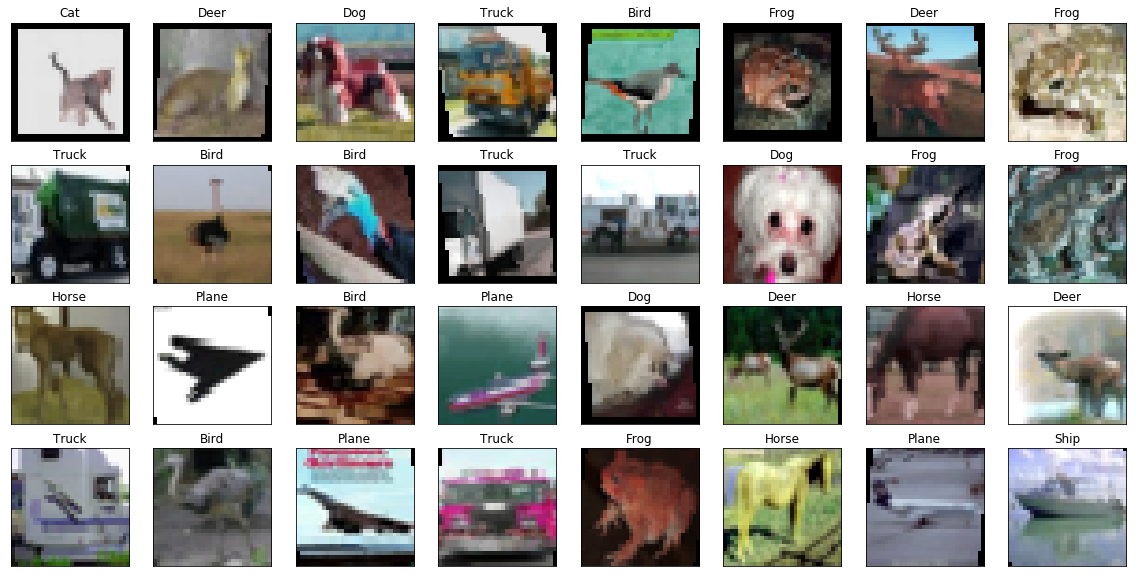

In [0]:
CIFAR_classes = 'Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'

imgs, labels = next(iter(loader_train))

def plot_img(img, label):
  img = img.numpy()
  img = img.transpose(1, 2, 0)
  img = img * np.array(normalization_params) + np.array(normalization_params)
  img = img.clip(0, 1)
  plt.imshow(img)
  plt.title(CIFAR_classes[label])

fig = plt.figure(figsize = (20, 10))

for i in range(32):
  fig.add_subplot(4, 8, i + 1, xticks = [], yticks = [])
  plot_img(imgs[i], labels[i])

**Define Classifier**

In [0]:
class ConvNet(t.nn.Module):
  
  def __init__(self):
    super().__init__()
    self.conv_1 = t.nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = 3, padding = 1)
    self.conv_2 = t.nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 3, padding = 1)
    self.conv_3 = t.nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1)
    self.pool = t.nn.MaxPool2d(2)
    self.fc_1 = t.nn.Linear(4 * 4 * 64, 500)
    self.dropout_1 = t.nn.Dropout(p = 0.3)
#     self.fc_2 = t.nn.Linear(500, 100)
#     self.dropout_2 = t.nn.Dropout(p = 0.1)
    self.fc_3 = t.nn.Linear(500, 10)
    
  def forward(self, x):  
    x = self.pool(t.nn.functional.relu(self.conv_1(x)))
    x = self.pool(t.nn.functional.relu(self.conv_2(x)))
    x = self.pool(t.nn.functional.relu(self.conv_3(x)))
    x = x.view(-1, 4 * 4 * 64)
    x = t.nn.functional.relu(self.fc_1(x))
    x = self.dropout_1(x)
#     x = t.nn.functional.relu(self.fc_2(x))
#     x = self.dropout_2(x)
    x = self.fc_3(x)
    return x

**Training**

In [0]:
epochs = 100
model = ConvNet().cuda()
loss_fn = t.nn.CrossEntropyLoss()
optimizer = t.optim.Adam(model.parameters(), lr = 1e-3)
losses_train, accuracies_train = [], []
losses_valid, accuracies_valid = [], []

def to_numpy(x):
  return x.cpu().detach().numpy()

def accuracy(y_pred, y):
  max_vals, max_indices = t.max(y_pred, 1)
  return t.sum(max_indices == y).item() / len(max_indices)

def train(x, y):
  global epoch_train_loss, epoch_train_accuracy
  y_pred = model.forward(x)
  loss = loss_fn(y_pred, y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  epoch_train_loss += loss
  epoch_train_accuracy += accuracy(y_pred, y)
  
def validate(x, y):
  global epoch_valid_loss, epoch_valid_accuracy
  y_pred = model.forward(x)
  loss = loss_fn(y_pred, y)
  epoch_valid_loss += loss
  epoch_valid_accuracy += accuracy(y_pred, y)
  
for i in range(epochs):
  epoch_train_loss, epoch_train_accuracy = 0, 0
  epoch_valid_loss, epoch_valid_accuracy = 0, 0
  # Training
  model.train()
  for x, y in loader_train:
    train(x.cuda(), y.cuda())
  losses_train.append(to_numpy(epoch_train_loss) / len(loader_train))
  accuracies_train.append(epoch_train_accuracy / len(loader_train))
  # Validation
  model.eval()
  with t.no_grad():
    for x, y in loader_valid:
      validate(x.cuda(), y.cuda())
    losses_valid.append(epoch_valid_loss / len(loader_valid))
    accuracies_valid.append(epoch_valid_accuracy / len(loader_valid))
  print('Finished epoch', i + 1)

Finished epoch 1
Finished epoch 2
Finished epoch 3
Finished epoch 4
Finished epoch 5
Finished epoch 6
Finished epoch 7
Finished epoch 8
Finished epoch 9
Finished epoch 10
Finished epoch 11
Finished epoch 12
Finished epoch 13
Finished epoch 14
Finished epoch 15
Finished epoch 16
Finished epoch 17
Finished epoch 18
Finished epoch 19
Finished epoch 20
Finished epoch 21
Finished epoch 22
Finished epoch 23
Finished epoch 24
Finished epoch 25
Finished epoch 26
Finished epoch 27
Finished epoch 28
Finished epoch 29
Finished epoch 30
Finished epoch 31
Finished epoch 32
Finished epoch 33
Finished epoch 34
Finished epoch 35
Finished epoch 36
Finished epoch 37
Finished epoch 38
Finished epoch 39
Finished epoch 40
Finished epoch 41
Finished epoch 42
Finished epoch 43
Finished epoch 44
Finished epoch 45
Finished epoch 46
Finished epoch 47
Finished epoch 48
Finished epoch 49
Finished epoch 50
Finished epoch 51
Finished epoch 52
Finished epoch 53
Finished epoch 54
Finished epoch 55
Finished epoch 56
F

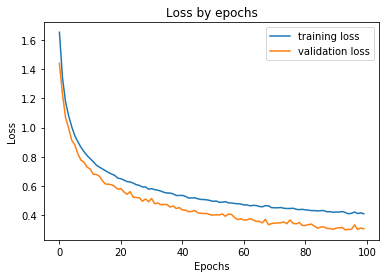

In [0]:
plt.plot(range(epochs), losses_train, label = 'training loss')
plt.plot(range(epochs), losses_valid, label = 'validation loss')
plt.title('Loss by epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

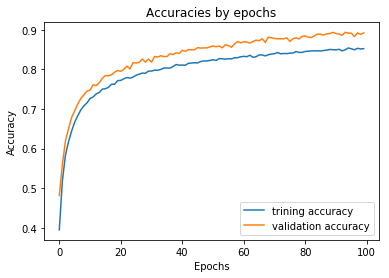

In [0]:
plt.plot(range(epochs), accuracies_train, label = 'trining accuracy')
plt.plot(range(epochs), accuracies_valid, label = 'validation accuracy')
plt.title('Accuracies by epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

**Make a prediction**

Cat


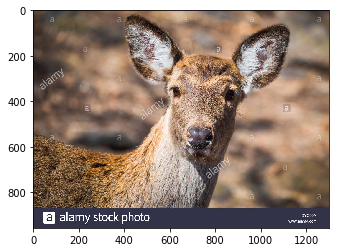

In [0]:
url = 'https://c8.alamy.com/comp/DYC06A/hornless-reindeer-at-zoo-DYC06A.jpg'
resp = req.get(url, stream = True)
img = pil.Image.open(resp.raw)
plt.imshow(img)
predict_transform = tv.transforms.Compose([
  tv.transforms.Resize(32),  
  tv.transforms.CenterCrop(32),
  tv.transforms.ToTensor()  
])
img = predict_transform(img)
with t.no_grad():
  img = img.view(1, 3, 32, 32)
  pred = model.forward(img.cuda())
  val_max, index_max = t.max(pred, 1)
  print(CIFAR_classes[index_max[0]])